In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays

In [8]:
# Cargar los archivos CSV de ventas y competencia desde la ruta relativa correcta
ventas_path = "../data/raw/entrenamiento/ventas.csv"
competencia_path = "../data/raw/entrenamiento/competencia.csv"

# Cargar los archivos CSV en DataFrames
ventas_df = pd.read_csv(ventas_path)
competencia_df = pd.read_csv(competencia_path)

# Mostrar las primeras filas de cada DataFrame para verificar
print("Ventas:")
print(ventas_df.head())
print("\nCompetencia:")
print(competencia_df.head())

Ventas:
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  
3         75.42    1

In [9]:
ventas_df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74


In [10]:
competencia_df.head()

,fecha,producto_id,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,82.96,111.88,97.43
1,2021-10-25,PROD_002,112.56,108.61,115.58
2,2021-10-25,PROD_003,79.79,78.44,80.11
3,2021-10-25,PROD_004,72.60,67.29,74.45
4,2021-10-25,PROD_005,37.71,33.60,33.07


In [11]:
# Validación de la calidad de datos del DataFrame ventas_df
print('--- INFORME DE CALIDAD DE DATOS: ventas_df ---')

# Tipos de variables
print('Tipos de variables:')
print(ventas_df.dtypes)
print('\n')

# Nulos por columna
print('Valores nulos por columna:')
print(ventas_df.isnull().sum())
print('\n')

# Duplicados
num_duplicados = ventas_df.duplicated().sum()
print(f'Registros duplicados: {num_duplicados}')
print('\n')

# Estadísticas descriptivas
print('Estadísticas descriptivas:')
print(ventas_df.describe(include='all'))
print('\n')

# Resumen final
print('--- RESUMEN FINAL ---')
if num_duplicados == 0:
    print('No hay registros duplicados.')
else:
    print(f'Hay {num_duplicados} registros duplicados.')

if ventas_df.isnull().sum().sum() == 0:
    print('No hay valores nulos.')
else:
    print('Existen valores nulos en el DataFrame.')

print('Revisa los tipos de datos y los valores atípicos en las estadísticas descriptivas.')

--- INFORME DE CALIDAD DE DATOS: ventas_df ---
Tipos de variables:
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object


Valores nulos por columna:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64


Registros duplicados: 0


Estadísticas descriptivas:
             fecha producto_id                    nombre categoria  \
count         3552        3552                      3552      3552   
unique         148          24                        24         4   
top     2021-10-25    PROD_001  Nike Air Zoom Pegasus 40   Running   
freq            24    

In [12]:
# Validación de la calidad de datos del DataFrame competencia_df
print('--- INFORME DE CALIDAD DE DATOS: competencia_df ---')

# Tipos de variables
print('Tipos de variables:')
print(competencia_df.dtypes)
print('\n')

# Nulos por columna
print('Valores nulos por columna:')
print(competencia_df.isnull().sum())
print('\n')

# Duplicados
num_duplicados = competencia_df.duplicated().sum()
print(f'Registros duplicados: {num_duplicados}')
print('\n')

# Estadísticas descriptivas
print('Estadísticas descriptivas:')
print(competencia_df.describe(include='all'))
print('\n')

# Resumen final
print('--- RESUMEN FINAL ---')
if num_duplicados == 0:
    print('No hay registros duplicados.')
else:
    print(f'Hay {num_duplicados} registros duplicados.')

if competencia_df.isnull().sum().sum() == 0:
    print('No hay valores nulos.')
else:
    print('Existen valores nulos en el DataFrame.')

print('Revisa los tipos de datos y los valores atípicos en las estadísticas descriptivas.')

--- INFORME DE CALIDAD DE DATOS: competencia_df ---
Tipos de variables:
fecha            object
producto_id      object
Amazon          float64
Decathlon       float64
Deporvillage    float64
dtype: object


Valores nulos por columna:
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64


Registros duplicados: 0


Estadísticas descriptivas:
             fecha producto_id       Amazon    Decathlon  Deporvillage
count         3552        3552  3552.000000  3552.000000   3552.000000
unique         148          24          NaN          NaN           NaN
top     2021-10-25    PROD_001          NaN          NaN           NaN
freq            24         148          NaN          NaN           NaN
mean           NaN         NaN   118.623407   111.412182    118.894628
std            NaN         NaN   156.095628   148.508132    160.216448
min            NaN         NaN    16.850000    15.450000     16.770000
25%            NaN         NaN    47.11

In [13]:
# Convertir la columna 'fecha' a tipo datetime en ambos DataFrames
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

# Verificar la conversión
print("tipo de fecha en ventas_df:", ventas_df['fecha'].dtype)
print("tipo de fecha en competencia_df:", competencia_df['fecha'].dtype)

tipo de fecha en ventas_df: datetime64[ns]
tipo de fecha en competencia_df: datetime64[ns]


In [14]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [15]:
competencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


In [16]:
# Integrar ventas_df y competencia_df en un nuevo DataFrame df usando 'fecha' y 'producto_id' como claves

df = pd.merge(
    ventas_df,
    competencia_df,
    how='inner',
    on=['fecha', 'producto_id']
    )

# Mostrar las primeras filas del DataFrame integrado
print(df.head())

       fecha producto_id                            nombre categoria  \
0 2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1 2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2 2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3 2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4 2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  Amazon  Decathlon  Deporvillage  
0        118.36    710.16   82.96     111.88         97.43  
1        136.82   1368.2

In [17]:
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Análisis de unidades vendidas por día de la semana
En este análisis visualizaremos la suma de unidades vendidas agrupadas por cada día de la semana para identificar patrones semanales.

C:\Users\white\AppData\Local\Temp\ipykernel_18656\2629283834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('nombre_dia')['unidades_vendidas'].sum().reindex(dias).reset_index(),


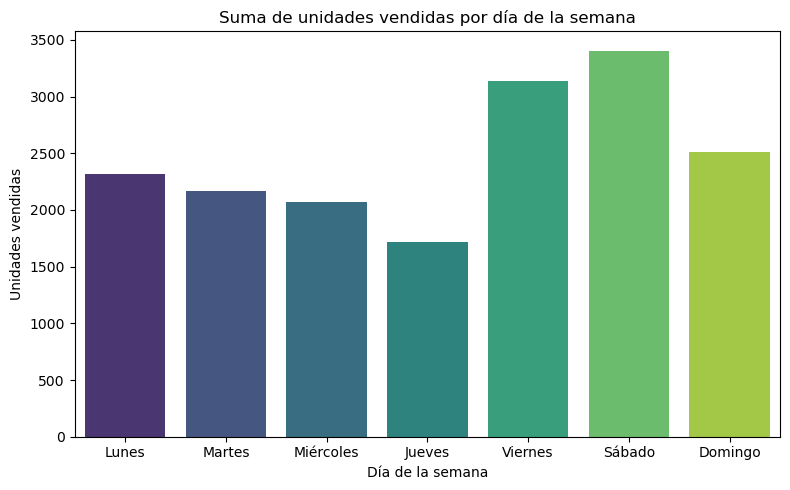

In [18]:
# Gráfico de suma de unidades vendidas por día de la semana
# 0=Lunes, 6=Domingo
df['dia_semana'] = df['fecha'].dt.dayofweek
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['nombre_dia'] = df['dia_semana'].map(dict(enumerate(dias)))

plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('nombre_dia')['unidades_vendidas'].sum().reindex(dias).reset_index(),
            x='nombre_dia', y='unidades_vendidas', palette='viridis')
plt.title('Suma de unidades vendidas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

## Análisis de unidades vendidas por categoría
A continuación, se muestra la suma de unidades vendidas agrupadas por cada categoría de producto.

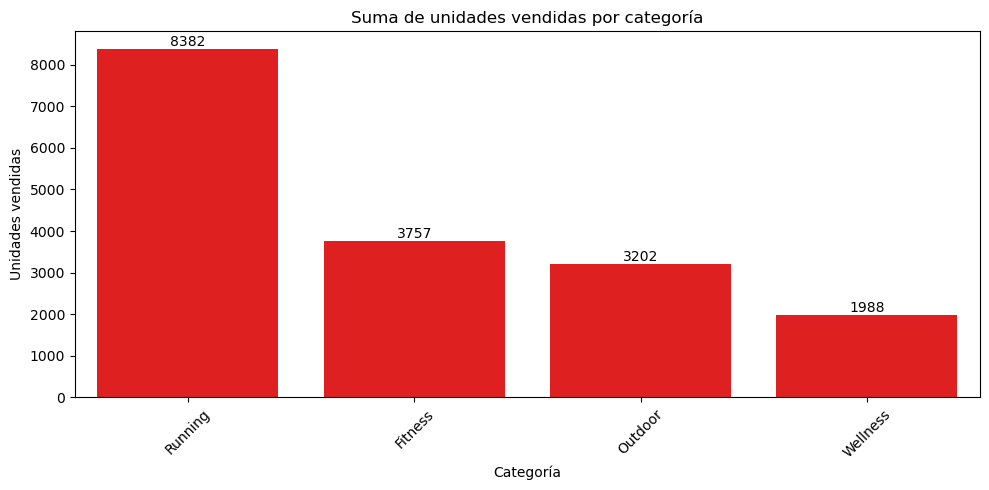

In [19]:
# Gráfico de suma de unidades vendidas por categoría con etiquetas de datos en cada barra (color rojo)
plt.figure(figsize=(10,5))
data_cat = df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(
    data=data_cat,
    x='categoria',
    y='unidades_vendidas',
    color="#FF0000"  # color rojo
)
plt.title('Suma de unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)

# Añadir etiquetas de datos a cada barra
for i, row in data_cat.iterrows():
    ax.text(i, row['unidades_vendidas'], int(row['unidades_vendidas']), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Análisis de unidades vendidas por subcategoría
Visualización de la suma de unidades vendidas agrupadas por subcategoría de producto.

C:\Users\white\AppData\Local\Temp\ipykernel_18656\1216134068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index(),


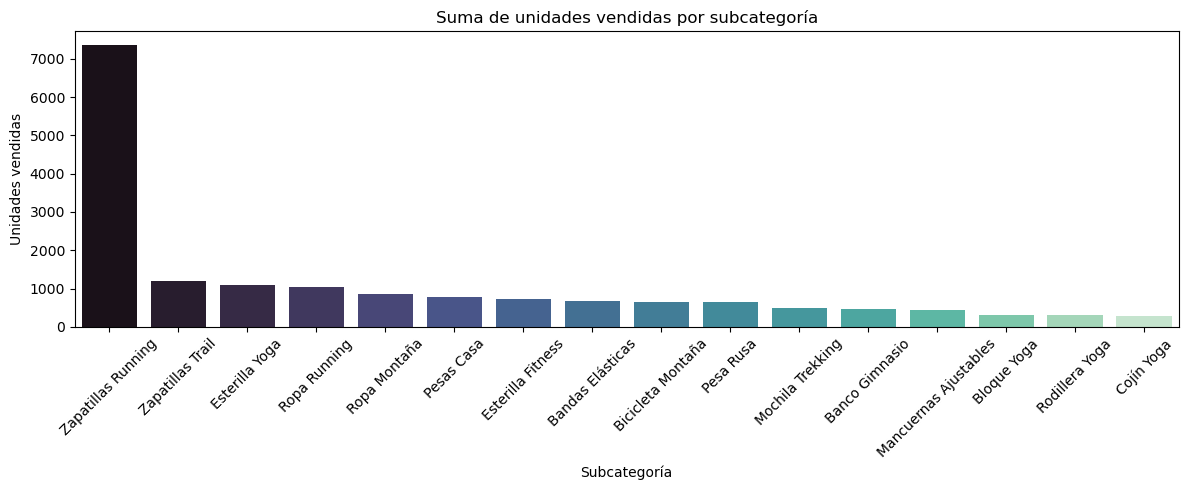

In [20]:
# Gráfico de suma de unidades vendidas por subcategoría
plt.figure(figsize=(12,5))
sns.barplot(data=df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index(),
            x='subcategoria', y='unidades_vendidas', palette='mako')
plt.title('Suma de unidades vendidas por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análisis de los productos más vendidos
A continuación, se muestran los productos con mayor cantidad de unidades vendidas (top 10).

C:\Users\white\AppData\Local\Temp\ipykernel_18656\1459853601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=productos_top, x='nombre', y='unidades_vendidas', palette='rocket')


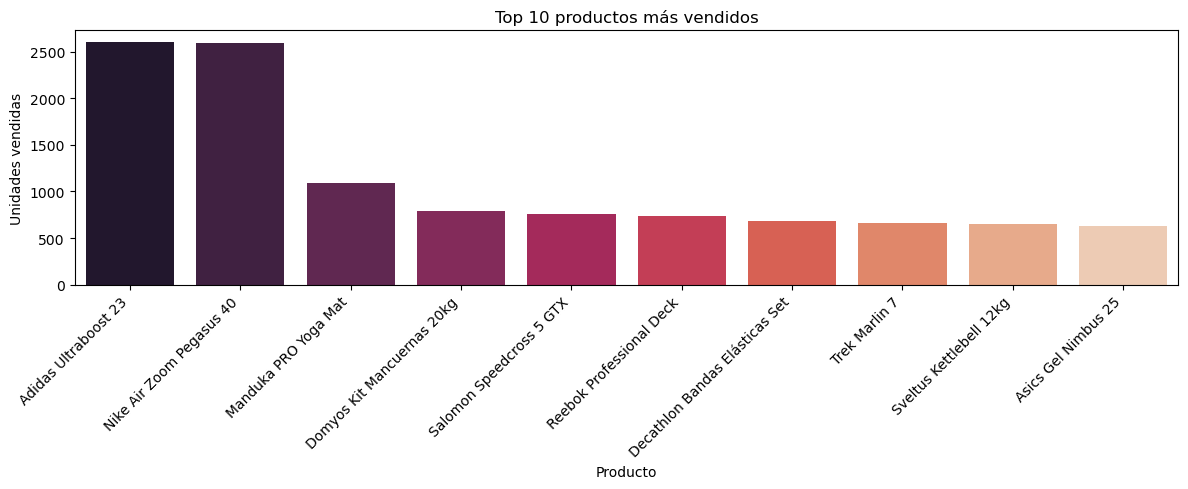

In [21]:
# Gráfico de los top 10 productos más vendidos
productos_top = df.groupby(['producto_id', 'nombre'])['unidades_vendidas'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=productos_top, x='nombre', y='unidades_vendidas', palette='rocket')
plt.title('Top 10 productos más vendidos')
plt.xlabel('Producto')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Análisis de la densidad de precios
A continuación, se analiza la densidad de la distribución de los precios de venta propios y los precios de Amazon como referencia de la competencia.

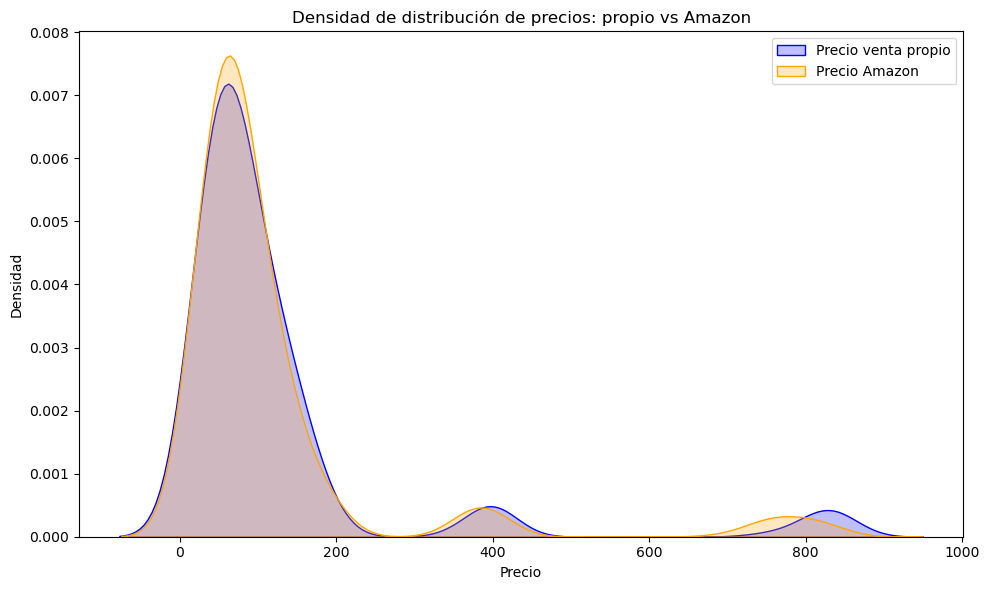

In [22]:
# Análisis de la densidad de distribución de los precios propios y de Amazon
plt.figure(figsize=(10,6))
sns.kdeplot(df['precio_venta'], label='Precio venta propio', fill=True, color='blue')
sns.kdeplot(df['Amazon'], label='Precio Amazon', fill=True, color='orange')
plt.title('Densidad de distribución de precios: propio vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

## Creación de variables temporales y de calendario
En esta celda se generan variables temporales útiles para el análisis y modelado, incluyendo festivos en España, Black Friday, Ciber Monday y otras variables de calendario.

In [23]:
# Creación de variables temporales y de calnedario usando holidays para España
import holidays

df['año'] = df['fecha'].dt.year

df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.day_name()
df['es_fin_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday'])

# Festivos en España
dias_festivos = holidays.country_holidays('ES', years=df['año'].unique())
df['es_festivo'] = df['fecha'].isin(dias_festivos)

# Black Friday (último viernes de noviembre)
def es_black_friday(fecha):
    if fecha.month == 11:
        nov = pd.date_range(start=f'{fecha.year}-11-01', end=f'{fecha.year}-11-30', freq='D')
        fridays = nov[nov.weekday == 4]
        return fecha == fridays[-1]
    return False
df['es_BlackFriday'] = df['fecha'].apply(es_black_friday)

# Cyber Monday (primer lunes después de Black Friday)
def es_cyber_monday(fecha):
    if fecha.month == 11 or fecha.month == 12:
        nov = pd.date_range(start=f'{fecha.year}-11-01', end=f'{fecha.year}-11-30', freq='D')
        fridays = nov[nov.weekday == 4]
        if len(fridays) > 0:
            cyber_monday = fridays[-1] + pd.Timedelta(days=3)
            return fecha == cyber_monday
    return False
df['es_cyber_monday'] = df['fecha'].apply(es_cyber_monday)

# Variable: trimestre
trimestre_map = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
df['trimestre'] = df['mes'].map(trimestre_map)

# Variable: semana del año
df['semana_año'] = df['fecha'].dt.isocalendar().week

# Variable: día laborable (no festivo y no fin de semana)
df['es_laborable'] = (~df['es_fin_semana']) & (~df['es_festivo'])

# Variable: inicio/fin de mes
df['es_inicio_mes'] = df['dia_mes'] <= 3
df['es_fin_mes'] = df['dia_mes'] >= (df['fecha'] + pd.offsets.MonthEnd(0)).dt.day - 2

# Mostrar las primeras filas para verificar
df.head()

C:\Users\white\AppData\Local\Temp\ipykernel_18656\2716362875.py:13: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['es_festivo'] = df['fecha'].isin(dias_festivos)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,dia_mes,es_fin_semana,es_festivo,es_BlackFriday,es_cyber_monday,trimestre,semana_año,es_laborable,es_inicio_mes,es_fin_mes
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,25,False,False,False,False,4,43,True,False,False
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,25,False,False,False,False,4,43,True,False,False
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,25,False,False,False,False,4,43,True,False,False
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,25,False,False,False,False,4,43,True,False,False
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,25,False,False,False,False,4,43,True,False,False


In [24]:
df.shape

(3552, 27)

In [25]:
# Creación de lags y media móvil de 7 días para unidades vendidas, por año
lags = range(1, 8)
for lag in lags:
    df[f'unidades_vendidas_lag_{lag}'] = df.groupby('año')['unidades_vendidas'].shift(lag)

# Media móvil de 7 días
# Ordenar por fecha para cada año
for year in df['año'].unique():
    mask = df['año'] == year
    df.loc[mask, 'unidades_vendidas_ma_7'] = df.loc[mask, 'unidades_vendidas'].rolling(window=7).mean().values

#Eliminar registros con nulos en alguna de las nuevas variables de lag o media móvil
cols_lag_ma = [f'unidades_vendidas_lag_{lag}' for lag in lags] + ['unidades_vendidas_ma_7']
df = df.dropna(subset=cols_lag_ma)

# Mostrar las primeras filas para verificar
print(df[cols_lag_ma + ['fecha', 'año', 'unidades_vendidas']].head())

    unidades_vendidas_lag_1  unidades_vendidas_lag_2  unidades_vendidas_lag_3  \
7                       2.0                      2.0                      2.0   
8                       2.0                      2.0                      2.0   
9                       2.0                      2.0                      2.0   
10                      2.0                      2.0                      2.0   
11                      3.0                      2.0                      2.0   

    unidades_vendidas_lag_4  unidades_vendidas_lag_5  unidades_vendidas_lag_6  \
7                       2.0                      2.0                     10.0   
8                       2.0                      2.0                      2.0   
9                       2.0                      2.0                      2.0   
10                      2.0                      2.0                      2.0   
11                      2.0                      2.0                      2.0   

    unidades_vendidas_lag_

In [26]:
df.groupby('año').size()

año
2021    881
2022    881
2023    881
2024    881
dtype: int64

In [27]:
# Variable de descuento porcentaje
# Fórmula: ((precio_venta - precio_base) / precio_base) * 100
df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100

# Mostrar las primeras filas para verificar
df[['fecha', 'producto_id', 'precio_base', 'precio_venta', 'descuento_porcentaje']].head()

,fecha,producto_id,precio_base,precio_venta,descuento_porcentaje
7,2021-10-25,PROD_008,65,66.60,2.461538
8,2021-10-25,PROD_009,400,392.31,-1.922500
9,2021-10-25,PROD_010,175,174.92,-0.045714
10,2021-10-25,PROD_011,45,44.32,-1.511111
11,2021-10-25,PROD_012,55,55.05,0.090909


In [28]:
# Variable precio_competencia: promedio de Amazon, Decathlon y Deporvillage
competidores = ['Amazon', 'Decathlon', 'Deporvillage']
df['precio_competencia'] = df[competidores].mean(axis=1)

# Variable ratio_precio: nuestro precio entre el precio promedio de la competencia
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']

# Eliminar las variables de los competidores
df = df.drop(columns=competidores)

# Mostrar las primeras filas para verificar
df[['fecha', 'producto_id', 'precio_venta', 'precio_competencia', 'ratio_precio']].head()

,fecha,producto_id,precio_venta,precio_competencia,ratio_precio
7,2021-10-25,PROD_008,66.60,64.346667,1.035019
8,2021-10-25,PROD_009,392.31,350.850000,1.118170
9,2021-10-25,PROD_010,174.92,160.156667,1.092181
10,2021-10-25,PROD_011,44.32,44.563333,0.994540
11,2021-10-25,PROD_012,55.05,53.246667,1.033868


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3524 entries, 7 to 3551
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fecha                    3524 non-null   datetime64[ns]
 1   producto_id              3524 non-null   object        
 2   nombre                   3524 non-null   object        
 3   categoria                3524 non-null   object        
 4   subcategoria             3524 non-null   object        
 5   precio_base              3524 non-null   int64         
 6   es_estrella              3524 non-null   bool          
 7   unidades_vendidas        3524 non-null   int64         
 8   precio_venta             3524 non-null   float64       
 9   ingresos                 3524 non-null   float64       
 10  dia_semana               3524 non-null   object        
 11  nombre_dia               3524 non-null   object        
 12  año                      3524 non-null 

In [30]:
# Crear copia de las variables con sufijo _h
for col in ['nombre', 'categoria', 'subcategoria']:
    df[f'{col}_h'] = df[col]

# One hot encoding sobre nombre_h, categoria_h y subcategoria_h
cols_h = ['nombre_h', 'categoria_h', 'subcategoria_h']
df = pd.get_dummies(df, columns=cols_h, prefix=cols_h)

df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
7,2021-10-25,PROD_008,Reebok Floatride Energy 5,Running,Zapatillas Running,65,False,2,66.60,133.20,...,False,False,False,False,False,False,False,False,True,False
8,2021-10-25,PROD_009,Bowflex SelectTech 552,Fitness,Mancuernas Ajustables,400,True,2,392.31,784.62,...,False,True,False,False,False,False,False,False,False,False
9,2021-10-25,PROD_010,Domyos BM900,Fitness,Banco Gimnasio,175,True,2,174.92,349.84,...,False,False,False,False,False,False,False,False,False,False
10,2021-10-25,PROD_011,Reebok Professional Deck,Fitness,Esterilla Fitness,45,False,3,44.32,132.96,...,False,False,False,False,False,False,False,False,False,False
11,2021-10-25,PROD_012,Domyos Kit Mancuernas 20kg,Fitness,Pesas Casa,55,False,3,55.05,165.15,...,False,False,False,False,True,False,False,False,False,False


In [31]:
# Guardar el DataFrame df en la carpeta data/processed
output_path = '../data/processed/df.csv'
df.to_csv(output_path, index=False)
print(f'DataFrame guardado en {output_path}')

DataFrame guardado en ../data/processed/df.csv


In [32]:
# Dividir df en train_df (2021-2023) y validation_df (2024)
train_df = df[df['año'].isin([2021, 2022, 2023])].copy()
validation_df = df[df['año'] == 2024].copy()

print(f'Registros en train_df: {len(train_df)}')
print(f'Registros en validation_df: {len(validation_df)}')

Registros en train_df: 2643
Registros en validation_df: 881


## Entrenamiento y validación de HistGradientBoostingRegressor
Entrenaremos un modelo HistGradientBoostingRegressor con parámetros conservadores para evitar overfitting. La variable objetivo será `unidades_vendidas` y las predictoras serán todas las variables numéricas excepto `fecha`, `ingresos` y las de tipo object. Se compararán las métricas con un baseline naive que predice la media.

In [34]:
# Selección de variables predictoras y target
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Excluir variables no permitidas
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
object_cols = train_df.select_dtypes(include=['object']).columns.tolist()
excluir += object_cols

X_train = train_df.drop(columns=excluir)
y_train = train_df['unidades_vendidas']
X_val = validation_df.drop(columns=excluir)
y_val = validation_df['unidades_vendidas']

# Entrenamiento del modelo con parámetros conservadores
model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=300,
    max_depth=6,
    l2_regularization=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_val)

# Baseline naive: predice la media de train
y_pred_naive = np.full_like(y_val, y_train.mean(), dtype=np.float64)

# Métricas de forecasting
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

mae_naive = mean_absolute_error(y_val, y_pred_naive)
mse_naive = mean_squared_error(y_val, y_pred_naive)
rmse_naive = np.sqrt(mse_naive)
r2_naive = r2_score(y_val, y_pred_naive)

print('--- Métricas HistGradientBoostingRegressor ---')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print('\n--- Métricas Baseline Naive (media) ---')
print(f'MAE: {mae_naive:.2f}')
print(f'MSE: {mse_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')
print(f'R2: {r2_naive:.2f}')

--- Métricas HistGradientBoostingRegressor ---
MAE: 0.70
MSE: 2.29
RMSE: 1.51
R2: 0.94

--- Métricas Baseline Naive (media) ---
MAE: 3.34
MSE: 39.09
RMSE: 6.25
R2: -0.00


C:\Users\white\AppData\Local\Temp\ipykernel_18656\714534407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noviembre_2024['prediccion'] = model.predict(X_noviembre)


<Figure size 1200x600 with 0 Axes>

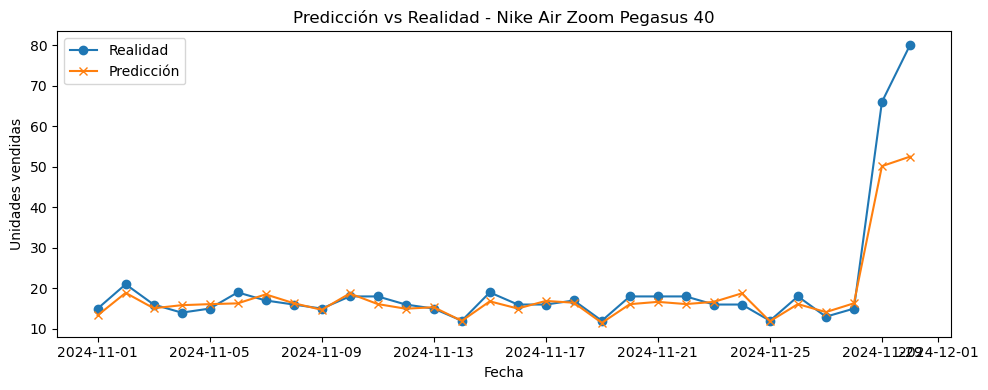

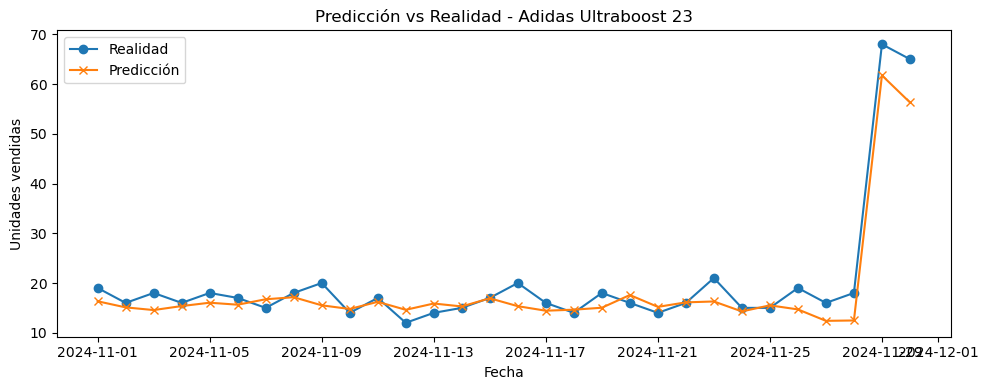

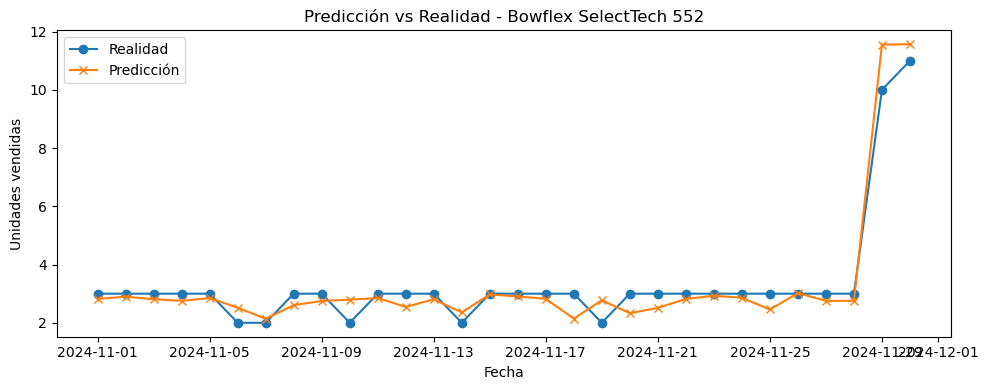

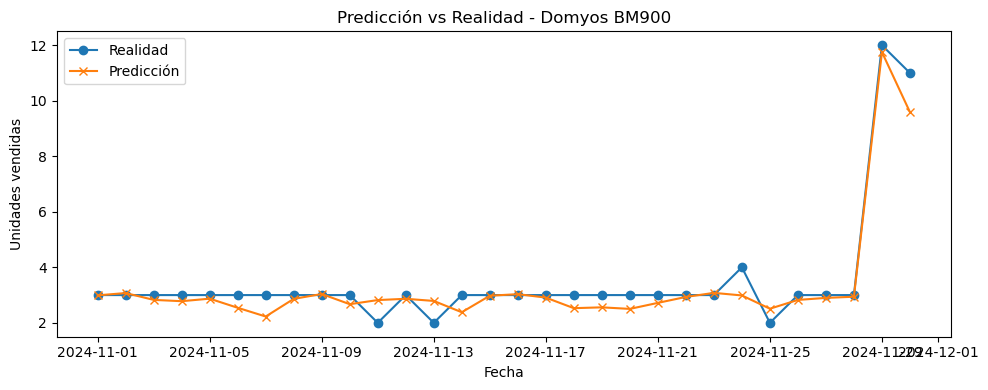

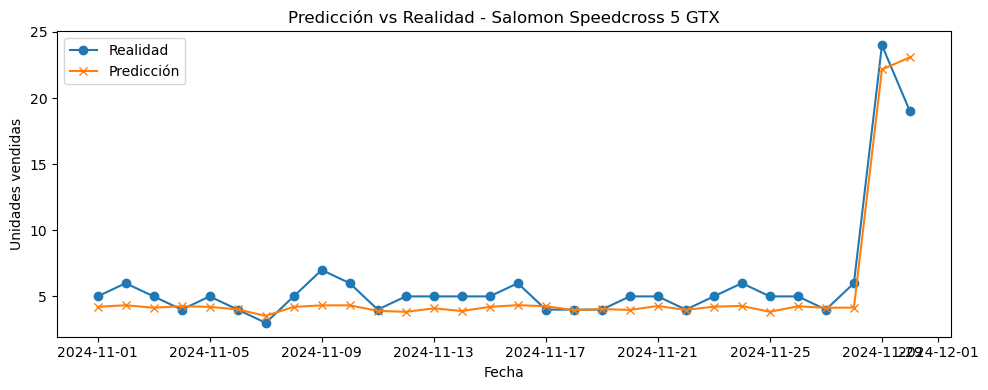

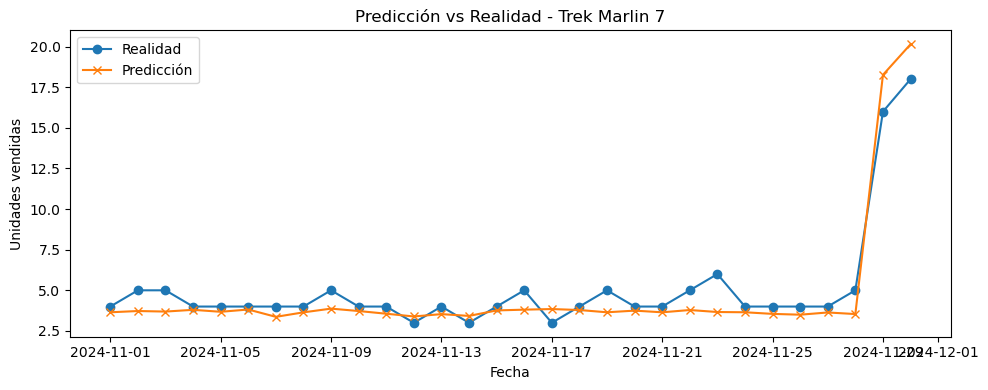

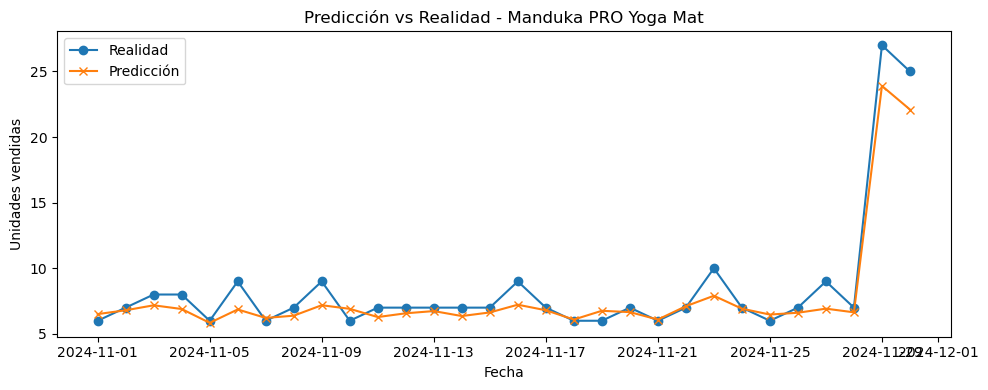

In [36]:
# Filtrar datos de noviembre 2024 y productos estrella
noviembre_2024 = validation_df[(validation_df['año'] == 2024) & (validation_df['mes'] == 11) & (validation_df['es_estrella'] == 1)]
productos_estrella = noviembre_2024['nombre'].unique()

# Preparar variables predictoras
X_noviembre = noviembre_2024.drop(columns=excluir)

# Generar predicciones
noviembre_2024['prediccion'] = model.predict(X_noviembre)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for producto in productos_estrella:
    datos_prod = noviembre_2024[noviembre_2024['nombre'] == producto].sort_values('fecha')
    plt.figure(figsize=(10,4))
    plt.plot(datos_prod['fecha'], datos_prod['unidades_vendidas'], label='Realidad', marker='o')
    plt.plot(datos_prod['fecha'], datos_prod['prediccion'], label='Predicción', marker='x')
    plt.title(f'Predicción vs Realidad - {producto}')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [37]:
# Calcular el MAE para cada producto estrella en noviembre 2024
from sklearn.metrics import mean_absolute_error
mae_productos = {}
for producto in productos_estrella:
    datos_prod = noviembre_2024[noviembre_2024['nombre'] == producto]
    mae = mean_absolute_error(datos_prod['unidades_vendidas'], datos_prod['prediccion'])
    mae_productos[producto] = mae

print('MAE por producto estrella en noviembre 2024:')
for producto, mae in mae_productos.items():
    print(f'{producto}: {mae:.2f}')

MAE por producto estrella en noviembre 2024:
Nike Air Zoom Pegasus 40: 2.60
Adidas Ultraboost 23: 2.38
Bowflex SelectTech 552: 0.36
Domyos BM900: 0.34
Salomon Speedcross 5 GTX: 1.01
Trek Marlin 7: 0.78
Manduka PRO Yoga Mat: 0.86


C:\Users\white\AppData\Local\Temp\ipykernel_18656\1063845851.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noviembre_2024['periodo'] = noviembre_2024['fecha'].apply(periodo_noviembre)


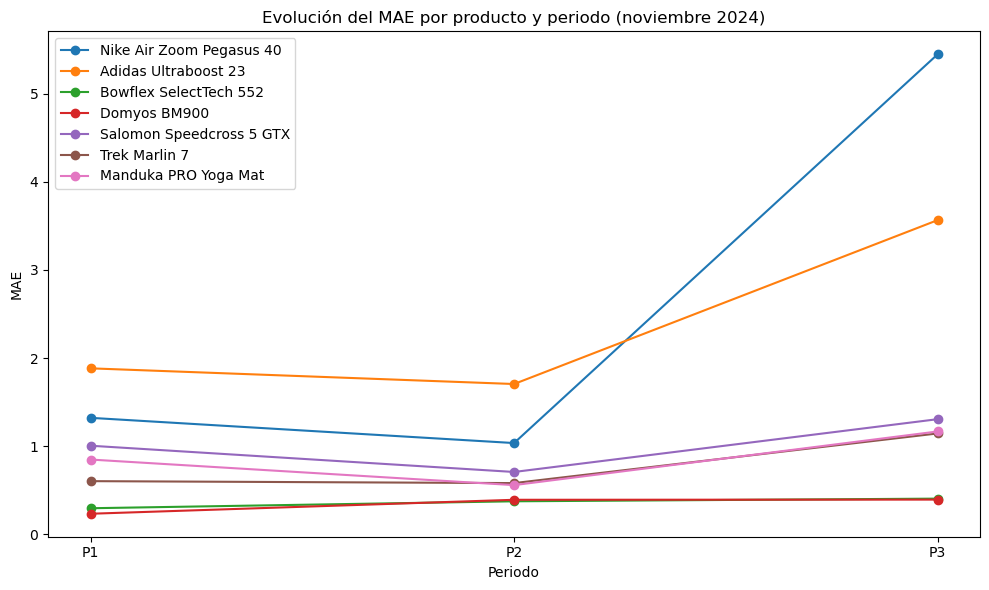

Métricas por producto y periodo (noviembre 2024):
                               MAE                          RMSE            \
periodo                         P1        P2        P3        P1        P2   
producto                                                                     
Adidas Ultraboost 23      1.883143  1.705283  3.564334  2.244842  2.167386   
Bowflex SelectTech 552    0.296237  0.374957  0.405244  0.360354  0.470388   
Domyos BM900              0.233722  0.392039  0.394211  0.321553  0.486878   
Manduka PRO Yoga Mat      0.848602  0.558545  1.167135  1.064787  0.721975   
Nike Air Zoom Pegasus 40  1.321684  1.035585  5.445074  1.517558  1.249456   
Salomon Speedcross 5 GTX  1.005399  0.707540  1.306390  1.254097  0.889270   
Trek Marlin 7             0.603562  0.581464  1.144739  0.742787  0.698207   

                                           R2                      
periodo                          P3        P1        P2        P3  
producto                         

In [39]:
# Dividir noviembre en 3 periodos de 10 días
def periodo_noviembre(fecha):
    dia = fecha.day
    if dia <= 10:
        return 'P1'
    elif dia <= 20:
        return 'P2'
    else:
        return 'P3'

noviembre_2024['periodo'] = noviembre_2024['fecha'].apply(periodo_noviembre)

# Calcular métricas por producto y periodo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
metricas = []
for producto in productos_estrella:
    for periodo in ['P1', 'P2', 'P3']:
        datos = noviembre_2024[(noviembre_2024['nombre'] == producto) & (noviembre_2024['periodo'] == periodo)]
        if len(datos) > 0:
            mae = mean_absolute_error(datos['unidades_vendidas'], datos['prediccion'])
            rmse = mean_squared_error(datos['unidades_vendidas'], datos['prediccion']) ** 0.5
            r2 = r2_score(datos['unidades_vendidas'], datos['prediccion'])
            metricas.append({'producto': producto, 'periodo': periodo, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
        else:
            metricas.append({'producto': producto, 'periodo': periodo, 'MAE': None, 'RMSE': None, 'R2': None})

metricas_df = pd.DataFrame(metricas)

# Gráfica de evolución del MAE por producto y periodo
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for producto in productos_estrella:
    datos_prod = metricas_df[metricas_df['producto'] == producto]
    plt.plot(datos_prod['periodo'], datos_prod['MAE'], marker='o', label=producto)
plt.title('Evolución del MAE por producto y periodo (noviembre 2024)')
plt.xlabel('Periodo')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar tabla de métricas
print('Métricas por producto y periodo (noviembre 2024):')
print(metricas_df.pivot(index='producto', columns='periodo', values=['MAE','RMSE','R2']))

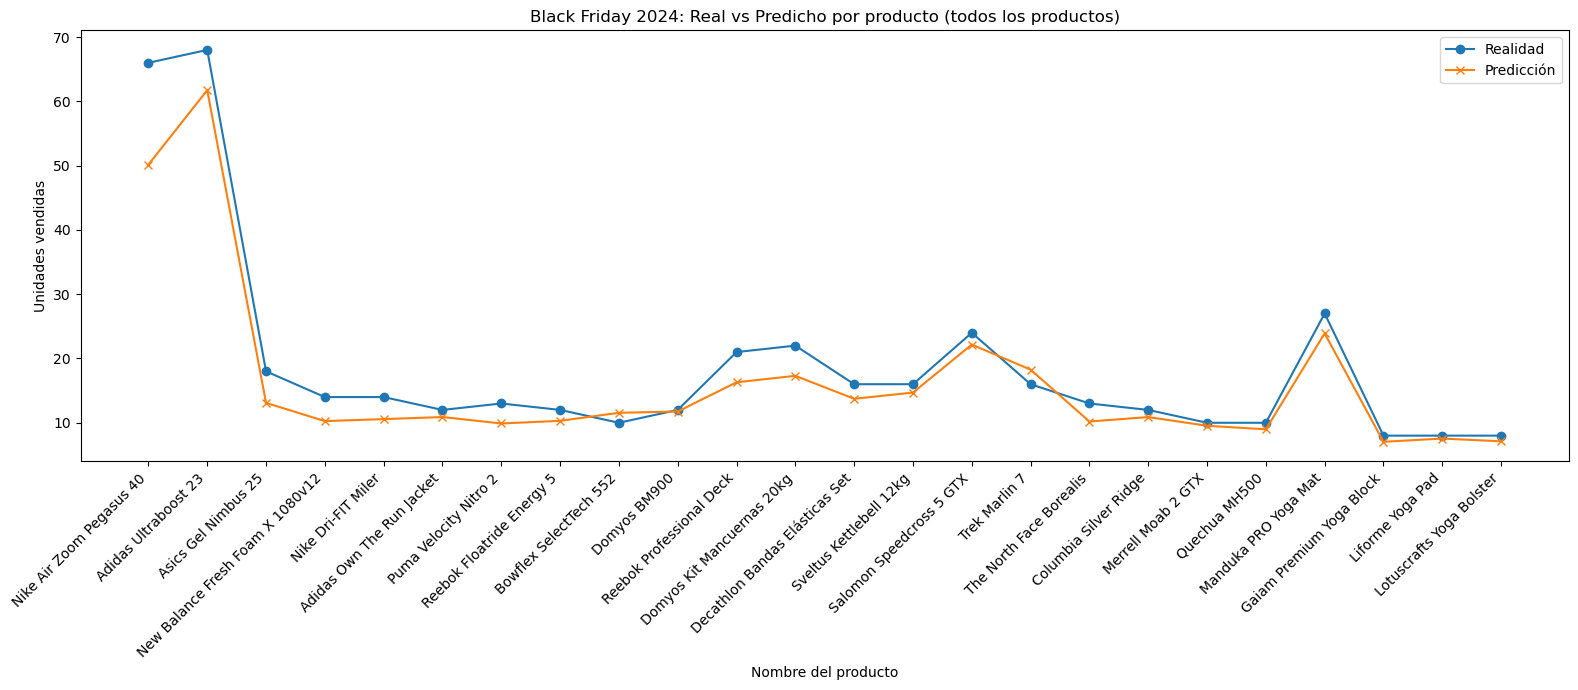

In [42]:
# Análisis específico de Black Friday 2024 para TODOS los productos con nombres legibles
bf_fecha = validation_df[(validation_df['año'] == 2024) & (validation_df['es_BlackFriday'] == True)]['fecha'].unique()
if len(bf_fecha) > 0:
    fecha_bf = bf_fecha[0]
    bf_df = validation_df[validation_df['fecha'] == fecha_bf].copy()
    # Preparar variables predictoras para todos los productos
    X_bf = bf_df.drop(columns=excluir)
    bf_df['prediccion'] = model.predict(X_bf)
    plt.figure(figsize=(16,7))
    plt.plot(bf_df['nombre'], bf_df['unidades_vendidas'], label='Realidad', marker='o')
    plt.plot(bf_df['nombre'], bf_df['prediccion'], label='Predicción', marker='x')
    plt.title('Black Friday 2024: Real vs Predicho por producto (todos los productos)')
    plt.xlabel('Nombre del producto')
    plt.ylabel('Unidades vendidas')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('No se encontró registro de Black Friday en validation_df.')

In [43]:
# Reentrenar el modelo final con todos los datos históricos (2021-2024)
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selección de variables predictoras y target sobre el DF completo
df_train_final = df.copy()
X_final = df_train_final.drop(columns=excluir)
y_final = df_train_final['unidades_vendidas']

# Entrenamiento del modelo final
modelo_final = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=300,
    max_depth=6,
    l2_regularization=1.0,
    random_state=42
)
modelo_final.fit(X_final, y_final)

print('Modelo final entrenado con todos los datos históricos (2021-2024)')

Modelo final entrenado con todos los datos históricos (2021-2024)


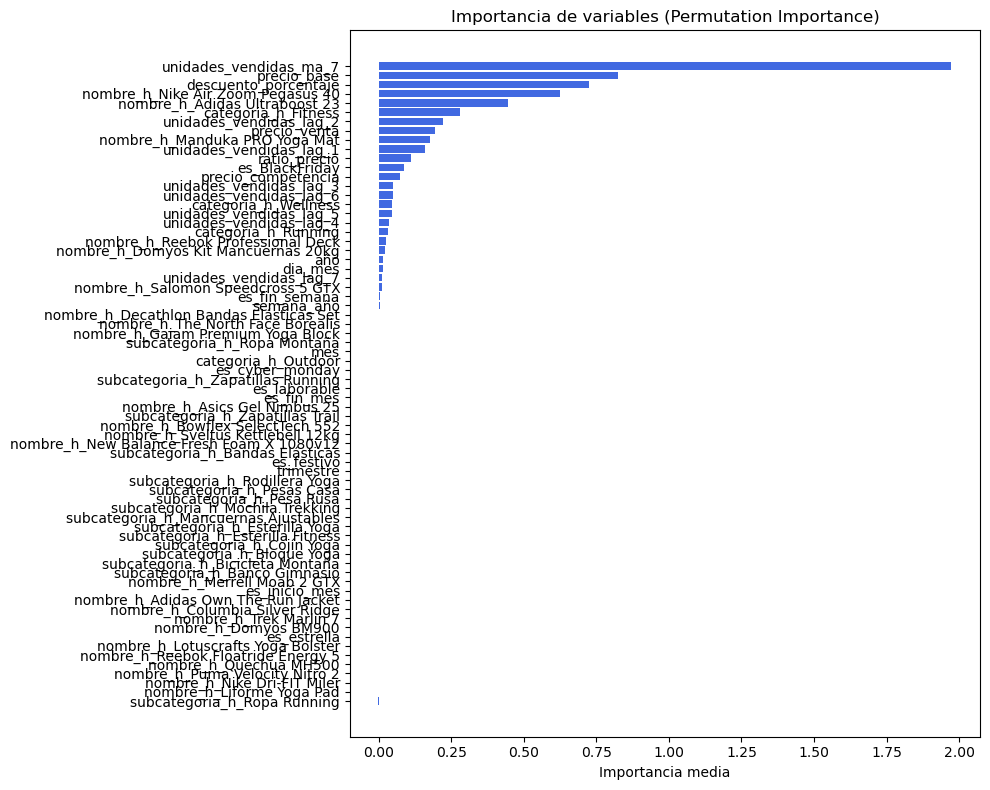

Modelo final guardado en ../models/modelo_final.joblib


In [45]:
# Importancia de variables con permutation importance y guardado del modelo final
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# Calcular permutation importance
result = permutation_importance(modelo_final, X_final, y_final, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importancias = result.importances_mean
features = X_final.columns

# Crear DataFrame de importancias y ordenarlas
importancias_df = pd.DataFrame({'feature': features, 'importance': importancias})
importancias_df = importancias_df.sort_values(by='importance', ascending=False)

# Gráfico de barras horizontales ordenado
plt.figure(figsize=(10,8))
plt.barh(importancias_df['feature'], importancias_df['importance'], color='royalblue')
plt.gca().invert_yaxis()
plt.title('Importancia de variables (Permutation Importance)')
plt.xlabel('Importancia media')
plt.tight_layout()
plt.show()

# Guardar el modelo final
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('Modelo final guardado en ../models/modelo_final.joblib')